In [1]:
import backtrader as bt
class MyStrategy(bt.Strategy):

    def __init__(self):
        self.sma = bt.indicators.SimpleMovingAverage(period=15)

    def next(self):
        if self.sma > self.data.close:
            # Do something
            pass

        elif self.sma < self.data.close:
            # Do something else
            pass

In [4]:
bt.__version__
import sys
sys.path

['F:\\Python Data Science',
 'F:\\Anaconda\\python37.zip',
 'F:\\Anaconda\\DLLs',
 'F:\\Anaconda\\lib',
 'F:\\Anaconda',
 '',
 'C:\\Users\\Alireza\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'F:\\Anaconda\\lib\\site-packages',
 'F:\\Anaconda\\lib\\site-packages\\win32',
 'F:\\Anaconda\\lib\\site-packages\\win32\\lib',
 'F:\\Anaconda\\lib\\site-packages\\Pythonwin',
 'F:\\Anaconda\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Alireza\\.ipython']

In [36]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime
import os.path
import sys
import backtrader as bt

class TestStrategy(bt.Strategy):
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None

        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=15)
        self.rsi = bt.indicators.RelativeStrengthIndex()

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        self.log('Close, %.2f' % self.dataclose[0])
        print('rsi:', self.rsi[0])
        if self.order:
            return

        if not self.position:
            if (self.rsi[0] < 30):
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.order = self.buy(size=500)

        else:
            if (self.rsi[0] > 70):
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                self.order = self.sell(size=500)


if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(TestStrategy)
    cerebro.broker.setcommission(commission=0.001)

    datapath = 'as.csv'

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        fromdate=datetime.datetime(2018, 5, 5),
        todate=datetime.datetime(2018, 5, 9),
        reverse=True)
    
    cerebro.adddata(data)
    cerebro.broker.setcash(100000.0)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.plot()

Starting Portfolio Value: 100000.00


IndexError: array assignment index out of range

In [26]:
import pandas as pd
df = pd.read_csv("as.csv", index_col = 0, parse_dates=['date'])
# df = df[["<OPEN>","<HIGH>","<LOW>","<CLOSE>","<VOL>"]]
# df = df[::-1]
# df.columns = ["open","high","low","close","volume"]

In [35]:
df['2018-5']

,open,high,low,close,volume
date,,,,,
2018-05-01,16634.0,17380.0,16900.0,17097.0,658585
2018-05-05,17097.0,17449.0,16900.0,17111.0,878961
2018-05-06,17111.0,17299.0,16930.0,17106.0,536437
2018-05-07,17106.0,17230.0,16980.0,17146.0,6795733
2018-05-08,17146.0,17288.0,17053.0,17201.0,466159
2018-05-09,17201.0,17440.0,17150.0,17239.0,406522
2018-05-12,17239.0,17400.0,17200.0,17260.0,494578
2018-05-13,17260.0,17400.0,17170.0,17272.0,514257
2018-05-14,17272.0,17410.0,17187.0,17304.0,1034048


In [44]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
#     modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
#     datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')
    datapath = 'as.csv'
    print(modpath)
    print(datapath)

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values after this date
        todate=datetime.datetime(2000, 12, 31),
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

F:\Anaconda\lib\site-packages
as.csv
Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


In [4]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.dataopen = self.datas[0].open
        self.high = self.datas[0].high
        self.low = self.datas[0].low
        self.volume = self.datas[0].volume

    def next(self):
        # Simply log the closing price of the series from the reference
#         print("Close",self.dataclose[0])
        self.log('Close-1, %.2f' % self.dataclose[-1])
        self.log('Close, %.2f' % self.dataclose[0])
        self.log('Open, %.2f' % self.dataopen[0])
        self.log('high, %.2f' % self.high[0])
        self.log('low, %.2f' % self.low[0])
        self.log('volume, %.2f' % self.volume[0])


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    print(modpath)
    datapath = os.path.join(modpath, '../../../as.csv')
    print(datapath)
#     datapath = '..//..//..//..//as.csv'
    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(1992, 1, 29),
        # Do not pass values before this date
        todate=datetime.datetime(2020, 2, 1),
        # Do not pass values after this date
        reverse=False,
        adjvolume=False,
        adjclose=False,
        r=False
    )

#     data = bt.feeds.BacktraderCSVData(dataname=datapath)
#     bt.feeds.BacktraderCSVData?
    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()
#     cerebro.plot()
#     %matplotlib inline
#     cerebro.plot()
    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

F:\Anaconda\lib\site-packages
F:\Anaconda\lib\site-packages\../../../as.csv
Starting Portfolio Value: 100000.00
2016-10-17, Close-1, 15468.00
2016-10-17, Close, 9999.00
2016-10-17, Open, 1000.00
2016-10-17, high, 9999.00
2016-10-17, low, 9999.00
2016-10-17, volume, 82560000.00
2016-10-18, Close-1, 9999.00
2016-10-18, Close, 10498.00
2016-10-18, Open, 9999.00
2016-10-18, high, 10498.00
2016-10-18, low, 10498.00
2016-10-18, volume, 1954419.00
2016-10-19, Close-1, 10498.00
2016-10-19, Close, 10910.00
2016-10-19, Open, 10498.00
2016-10-19, high, 11022.00
2016-10-19, low, 11022.00
2016-10-19, volume, 314876.00
2016-10-22, Close-1, 10910.00
2016-10-22, Close, 11455.00
2016-10-22, Open, 10910.00
2016-10-22, high, 11455.00
2016-10-22, low, 11455.00
2016-10-22, volume, 6126912.00
2016-10-23, Close-1, 11455.00
2016-10-23, Close, 12027.00
2016-10-23, Open, 11455.00
2016-10-23, high, 12027.00
2016-10-23, low, 12027.00
2016-10-23, volume, 13486833.00
2016-10-24, Close-1, 12027.00
2016-10-24, Close,

2017-04-19, Close, 25445.00
2017-04-19, Open, 24456.00
2017-04-19, high, 25678.00
2017-04-19, low, 24701.00
2017-04-19, volume, 6787540.00
2017-04-22, Close-1, 25445.00
2017-04-22, Close, 25584.00
2017-04-22, Open, 25445.00
2017-04-22, high, 26350.00
2017-04-22, low, 25090.00
2017-04-22, volume, 5797301.00
2017-04-23, Close-1, 25584.00
2017-04-23, Close, 24833.00
2017-04-23, Open, 25584.00
2017-04-23, high, 25575.00
2017-04-23, low, 24450.00
2017-04-23, volume, 1740037.00
2017-04-24, Close-1, 24833.00
2017-04-24, Close, 25778.00
2017-04-24, Open, 24833.00
2017-04-24, high, 26074.00
2017-04-24, low, 24878.00
2017-04-24, volume, 2002455.00
2017-04-26, Close-1, 25778.00
2017-04-26, Close, 26358.00
2017-04-26, Open, 25778.00
2017-04-26, high, 26980.00
2017-04-26, low, 25451.00
2017-04-26, volume, 1630591.00
2017-04-29, Close-1, 26358.00
2017-04-29, Close, 25123.00
2017-04-29, Open, 26358.00
2017-04-29, high, 25790.00
2017-04-29, low, 25041.00
2017-04-29, volume, 1198685.00
2017-04-30, Clos

2017-09-27, Close-1, 12990.00
2017-09-27, Close, 13610.00
2017-09-27, Open, 12990.00
2017-09-27, high, 13639.00
2017-09-27, low, 13253.00
2017-09-27, volume, 13862053.00
2017-10-02, Close-1, 13610.00
2017-10-02, Close, 13323.00
2017-10-02, Open, 13610.00
2017-10-02, high, 13640.00
2017-10-02, low, 13000.00
2017-10-02, volume, 2424919.00
2017-10-03, Close-1, 13323.00
2017-10-03, Close, 13307.00
2017-10-03, Open, 13323.00
2017-10-03, high, 13500.00
2017-10-03, low, 13204.00
2017-10-03, volume, 2293858.00
2017-10-04, Close-1, 13307.00
2017-10-04, Close, 13884.00
2017-10-04, Open, 13307.00
2017-10-04, high, 13972.00
2017-10-04, low, 13449.00
2017-10-04, volume, 4785283.00
2017-10-07, Close-1, 13884.00
2017-10-07, Close, 13707.00
2017-10-07, Open, 13884.00
2017-10-07, high, 13969.00
2017-10-07, low, 13550.00
2017-10-07, volume, 1464964.00
2017-10-08, Close-1, 13707.00
2017-10-08, Close, 13778.00
2017-10-08, Open, 13707.00
2017-10-08, high, 14180.00
2017-10-08, low, 13411.00
2017-10-08, volu

2018-01-08, high, 15700.00
2018-01-08, low, 15500.00
2018-01-08, volume, 664662.00
2018-01-09, Close-1, 15600.00
2018-01-09, Close, 15812.00
2018-01-09, Open, 15600.00
2018-01-09, high, 15858.00
2018-01-09, low, 15700.00
2018-01-09, volume, 753229.00
2018-01-10, Close-1, 15812.00
2018-01-10, Close, 15858.00
2018-01-10, Open, 15812.00
2018-01-10, high, 15940.00
2018-01-10, low, 15801.00
2018-01-10, volume, 383978.00
2018-01-13, Close-1, 15858.00
2018-01-13, Close, 16117.00
2018-01-13, Open, 15858.00
2018-01-13, high, 16299.00
2018-01-13, low, 15890.00
2018-01-13, volume, 661138.00
2018-01-14, Close-1, 16117.00
2018-01-14, Close, 16712.00
2018-01-14, Open, 16117.00
2018-01-14, high, 16900.00
2018-01-14, low, 16355.00
2018-01-14, volume, 852395.00
2018-01-15, Close-1, 16712.00
2018-01-15, Close, 16623.00
2018-01-15, Open, 16712.00
2018-01-15, high, 16780.00
2018-01-15, low, 16450.00
2018-01-15, volume, 335680.00
2018-01-16, Close-1, 16623.00
2018-01-16, Close, 16497.00
2018-01-16, Open, 1

2018-04-17, Close, 17948.00
2018-04-17, Open, 17979.00
2018-04-17, high, 18190.00
2018-04-17, low, 17804.00
2018-04-17, volume, 224082.00
2018-04-18, Close-1, 17948.00
2018-04-18, Close, 17935.00
2018-04-18, Open, 17948.00
2018-04-18, high, 17968.00
2018-04-18, low, 17809.00
2018-04-18, volume, 351613.00
2018-04-21, Close-1, 17935.00
2018-04-21, Close, 17932.00
2018-04-21, Open, 17935.00
2018-04-21, high, 18000.00
2018-04-21, low, 17800.00
2018-04-21, volume, 209629.00
2018-04-22, Close-1, 17932.00
2018-04-22, Close, 17624.00
2018-04-22, Open, 17932.00
2018-04-22, high, 17990.00
2018-04-22, low, 17123.00
2018-04-22, volume, 348823.00
2018-04-23, Close-1, 17624.00
2018-04-23, Close, 17403.00
2018-04-23, Open, 17624.00
2018-04-23, high, 17400.00
2018-04-23, low, 17010.00
2018-04-23, volume, 271573.00
2018-04-24, Close-1, 17403.00
2018-04-24, Close, 17205.00
2018-04-24, Open, 17403.00
2018-04-24, high, 17100.00
2018-04-24, low, 17000.00
2018-04-24, volume, 291041.00
2018-04-25, Close-1, 1

2018-09-15, Open, 14543.00
2018-09-15, high, 15270.00
2018-09-15, low, 14490.00
2018-09-15, volume, 2584694.00
2018-09-16, Close-1, 15080.00
2018-09-16, Close, 14960.00
2018-09-16, Open, 15080.00
2018-09-16, high, 15650.00
2018-09-16, low, 14600.00
2018-09-16, volume, 588992.00
2018-09-17, Close-1, 14960.00
2018-09-17, Close, 14989.00
2018-09-17, Open, 14960.00
2018-09-17, high, 15199.00
2018-09-17, low, 14694.00
2018-09-17, volume, 773895.00
2018-09-18, Close-1, 14989.00
2018-09-18, Close, 14842.00
2018-09-18, Open, 14989.00
2018-09-18, high, 14989.00
2018-09-18, low, 14601.00
2018-09-18, volume, 490287.00
2018-09-22, Close-1, 14842.00
2018-09-22, Close, 15034.00
2018-09-22, Open, 14842.00
2018-09-22, high, 15150.00
2018-09-22, low, 14760.00
2018-09-22, volume, 2069503.00
2018-09-23, Close-1, 15034.00
2018-09-23, Close, 15647.00
2018-09-23, Open, 15034.00
2018-09-23, high, 15785.00
2018-09-23, low, 15161.00
2018-09-23, volume, 2811296.00
2018-09-24, Close-1, 15647.00
2018-09-24, Close

2019-03-12, volume, 666207.00
2019-03-13, Close-1, 10789.00
2019-03-13, Close, 10853.00
2019-03-13, Open, 10789.00
2019-03-13, high, 10996.00
2019-03-13, low, 10602.00
2019-03-13, volume, 1099109.00
2019-03-16, Close-1, 10853.00
2019-03-16, Close, 10722.00
2019-03-16, Open, 10853.00
2019-03-16, high, 10863.00
2019-03-16, low, 10483.00
2019-03-16, volume, 1888791.00
2019-03-17, Close-1, 10722.00
2019-03-17, Close, 11158.00
2019-03-17, Open, 10722.00
2019-03-17, high, 11258.00
2019-03-17, low, 10460.00
2019-03-17, volume, 3537351.00
2019-03-18, Close-1, 11158.00
2019-03-18, Close, 11710.00
2019-03-18, Open, 11158.00
2019-03-18, high, 11715.00
2019-03-18, low, 11370.00
2019-03-18, volume, 3944320.00
2019-03-19, Close-1, 11710.00
2019-03-19, Close, 11875.00
2019-03-19, Open, 11710.00
2019-03-19, high, 12099.00
2019-03-19, low, 11705.00
2019-03-19, volume, 2677161.00
2019-03-25, Close-1, 11875.00
2019-03-25, Close, 11890.00
2019-03-25, Open, 11875.00
2019-03-25, high, 11958.00
2019-03-25, l

2019-07-22, Close-1, 13893.00
2019-07-22, Close, 14213.00
2019-07-22, Open, 13893.00
2019-07-22, high, 14395.00
2019-07-22, low, 14000.00
2019-07-22, volume, 726785.00
2019-07-23, Close-1, 14213.00
2019-07-23, Close, 13857.00
2019-07-23, Open, 14213.00
2019-07-23, high, 14250.00
2019-07-23, low, 13651.00
2019-07-23, volume, 489618.00
2019-07-24, Close-1, 13857.00
2019-07-24, Close, 14003.00
2019-07-24, Open, 13857.00
2019-07-24, high, 14188.00
2019-07-24, low, 13700.00
2019-07-24, volume, 567975.00
2019-07-27, Close-1, 14003.00
2019-07-27, Close, 13641.00
2019-07-27, Open, 14003.00
2019-07-27, high, 14241.00
2019-07-27, low, 13552.00
2019-07-27, volume, 285872.00
2019-07-28, Close-1, 13641.00
2019-07-28, Close, 13546.00
2019-07-28, Open, 13641.00
2019-07-28, high, 13900.00
2019-07-28, low, 13300.00
2019-07-28, volume, 395828.00
2019-07-29, Close-1, 13546.00
2019-07-29, Close, 13216.00
2019-07-29, Open, 13546.00
2019-07-29, high, 13577.00
2019-07-29, low, 13050.00
2019-07-29, volume, 67

2019-12-02, Close-1, 15839.00
2019-12-02, Close, 15581.00
2019-12-02, Open, 15839.00
2019-12-02, high, 16100.00
2019-12-02, low, 15300.00
2019-12-02, volume, 2564248.00
2019-12-03, Close-1, 15581.00
2019-12-03, Close, 15812.00
2019-12-03, Open, 15581.00
2019-12-03, high, 16360.00
2019-12-03, low, 15274.00
2019-12-03, volume, 2961427.00
2019-12-04, Close-1, 15812.00
2019-12-04, Close, 16565.00
2019-12-04, Open, 15812.00
2019-12-04, high, 16602.00
2019-12-04, low, 15850.00
2019-12-04, volume, 10994464.00
2019-12-07, Close-1, 16565.00
2019-12-07, Close, 16822.00
2019-12-07, Open, 16565.00
2019-12-07, high, 17200.00
2019-12-07, low, 16380.00
2019-12-07, volume, 2916200.00
2019-12-08, Close-1, 16822.00
2019-12-08, Close, 16824.00
2019-12-08, Open, 16822.00
2019-12-08, high, 17099.00
2019-12-08, low, 16150.00
2019-12-08, volume, 6980191.00
2019-12-09, Close-1, 16824.00
2019-12-09, Close, 16485.00
2019-12-09, Open, 16824.00
2019-12-09, high, 16850.00
2019-12-09, low, 16198.00
2019-12-09, volu

In [76]:
class customCSV(bt.feeds.GenericCSVData):
    params = (
        ('dtformat', '%m-%d-%Y'),
        ('tmformat', '%H:%M:%S.%f'),
        ('datetime', 0),
        ('time', 1),
        ('open', 2),
        ('high', 3),
        ('low', 4),
        ('close', 5),
        ('volume', -1),
        ('openinterest', -1),
    )

In [108]:
import backtrader.feeds as btfeeds
data = btfeeds.YahooFinanceCSVData(dataname='as.csv')

In [188]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime
import os.path
import sys
import backtrader as bt

class TestStrategy(bt.Strategy):
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None

        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=15)
        self.rsi = bt.indicators.RelativeStrengthIndex()

#     def notify_order(self, order):
#         if order.status in [order.Submitted, order.Accepted]:
#             return

#         if order.status in [order.Completed]:
#             if order.isbuy():
#                 self.log(
#                     'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
#                     (order.executed.price,
#                      order.executed.value,
#                      order.executed.comm))

#                 self.buyprice = order.executed.price
#                 self.buycomm = order.executed.comm
#             else:  # Sell
#                 self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
#                          (order.executed.price,
#                           order.executed.value,
#                           order.executed.comm))

#             self.bar_executed = len(self)

#         elif order.status in [order.Canceled, order.Margin, order.Rejected]:
#             self.log('Order Canceled/Margin/Rejected')

#         # Write down: no pending order
#         self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

#         self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
#                  (trade.pnl, trade.pnlcomm))

    def next(self):
        self.log('Close, %.2f' % self.dataclose[0])
        print('rsi:', self.rsi[0])
#         if self.order:
#             return

#         if not self.position:
#             if (self.rsi[0] < 30):
#                 self.log('BUY CREATE, %.2f' % self.dataclose[0])
#                 self.order = self.buy(size=500)

#         else:
#             if (self.rsi[0] > 70):
#                 self.log('SELL CREATE, %.2f' % self.dataclose[0])
#                 self.order = self.sell(size=500)


if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(TestStrategy)
    cerebro.broker.setcommission(commission=0.001)

    
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    datapath = os.path.join(modpath, '../../../as.csv')
#     datapath = 'FB.csv'

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        fromdate=datetime.datetime(2017, 1, 1),
        todate=datetime.datetime(2018, 8, 5),
        reverse=False)

    cerebro.adddata(data)
    cerebro.broker.setcash(100000.0)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
#     cerebro.plot()

Starting Portfolio Value: 100000.00
2017-01-22, Close, 486448.00
rsi: 48.5126015958533
2017-01-23, Close, 259552.00
rsi: 47.84833212911773
2017-01-24, Close, 770523.00
rsi: 49.52452592218712
2017-01-25, Close, 317710.00
rsi: 48.05064444778199
2017-01-28, Close, 357771.00
rsi: 48.19753040584803
2017-01-29, Close, 1348387.00
rsi: 51.82489353871742
2017-01-30, Close, 540884.00
rsi: 48.823695146991106
2017-01-31, Close, 529110.00
rsi: 48.77933869859357
2017-02-01, Close, 836753.00
rsi: 50.05611877933279
2017-02-04, Close, 426185.00
rsi: 48.324851241683184
2017-02-05, Close, 812933.00
rsi: 50.076471459348234
2017-02-06, Close, 438972.00
rsi: 48.3691716835139
2017-02-07, Close, 666878.00
rsi: 49.49919777366324
2017-02-08, Close, 896005.00
rsi: 50.6681899960169
2017-02-11, Close, 1586197.00
rsi: 54.11385648581816
2017-02-12, Close, 324898.00
rsi: 47.574258772806935
2017-02-13, Close, 705611.00
rsi: 49.55586591029848
2017-02-14, Close, 213056.00
rsi: 47.076618072470374
2017-02-15, Close, 21468

rsi: 52.76143331862962
2018-01-02, Close, 1943655.00
rsi: 50.651375395660864
2018-01-03, Close, 2434523.00
rsi: 52.0102381355876
2018-01-06, Close, 544127.00
rsi: 46.67936630359172
2018-01-07, Close, 968484.00
rsi: 47.96861890610945
2018-01-08, Close, 664662.00
rsi: 47.09070795727472
2018-01-09, Close, 753229.00
rsi: 47.392963647999196
2018-01-10, Close, 383978.00
rsi: 46.20776292301293
2018-01-13, Close, 661138.00
rsi: 47.273621392869046
2018-01-14, Close, 852395.00
rsi: 48.038744018744715
2018-01-15, Close, 335680.00
rsi: 46.09269568560073
2018-01-16, Close, 486012.00
rsi: 46.768338327007854
2018-01-17, Close, 3803243.00
rsi: 58.984318764992416
2018-01-20, Close, 568691.00
rsi: 47.53042589763626
2018-01-21, Close, 258829.00
rsi: 46.59692935696419
2018-01-22, Close, 298701.00
rsi: 46.74187702993989
2018-01-23, Close, 800694.00
rsi: 48.632260018965205
2018-01-24, Close, 825636.00
rsi: 48.72963528302119
2018-01-27, Close, 654752.00
rsi: 48.05747331912315
2018-01-28, Close, 1099074.00
rs

<IPython.core.display.Javascript object>


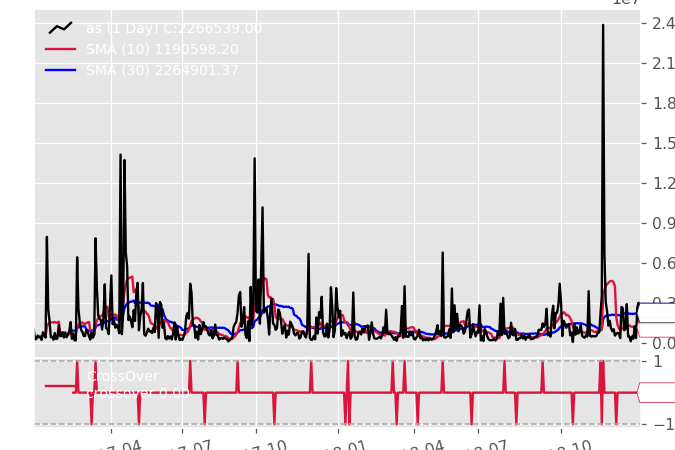

[[<Figure size 432x288 with 3 Axes>]]

In [207]:
from datetime import datetime
import backtrader as bt
import matplotlib as plt
plt.style.use('ggplot')

class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

cerebro = bt.Cerebro(stdstats=False)
cerebro.addstrategy(SmaCross)

modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
datapath = os.path.join(modpath, '../../../as.csv')
data0 = bt.feeds.YahooFinanceData(dataname=datapath, fromdate=datetime(2017, 1, 1),
                                  todate=datetime(2018, 12, 31))
cerebro.adddata(data0)

cerebro.run()
%matplotlib inline
cerebro.plot()

In [5]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
        ('printlog', False),
    )
    def log(self, txt, dt=None, doprint=False):
        ''' Logging function for this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.order = None
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)
#         bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
#         bt.indicators.WeightedMovingAverage(self.datas[0], period=25,
#                                             subplot=True)
#         bt.indicators.StochasticSlow(self.datas[0])
#         bt.indicators.MACDHisto(self.datas[0])
#         rsi = bt.indicators.RSI(self.datas[0])
#         bt.indicators.SmoothedMovingAverage(rsi, period=10)
#         bt.indicators.ATR(self.datas[0], plot=False)

    def next(self):
#         print('------------------------------------------------')
#         self.log('Close: %.2f' % self.dataclose[0])
#         print("SMA: " , self.sma[0])
#         print("POS", self.position)
#         if self.position:
#             print("lne is :" , len(self), self.bar_executed)

        if self.order:
            return

        if not self.position:
            if self.dataclose[0] > self.sma[0]:
                '''BUY SIGNAL'''
#                 self.log("Buy Signal: %.2f" % self.dataclose[0])
                self.order = self.buy()
        else :
            if self.dataclose[0] < self.sma[0]:
#                 self.log("SELL Signal: %.2f" % self.dataclose[0])
                self.order = self.sell()
        
            
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
        if order.status is order.Completed:
            if order.isbuy():
                pass
#                 print("***BUY EXECUTED")
#                 self.log(
#                     'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
#                     (order.executed.price,
#                      order.executed.value,
#                      order.executed.comm))
            else:
                pass
#                 print("!!!SELL EXECUTED")
#                 self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
#                          (order.executed.price,
#                           order.executed.value,
#                           order.executed.comm))
            self.bar_executed = len(self)
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            pass
#             self.log('Order Canceled/Margin/Rejected')
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return

#         self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
#                  (trade.pnl, trade.pnlcomm))
        
    def stop(self):
        self.log('(MA Period %2d) Ending Value %.2f' %
                 (self.params.maperiod, self.broker.getvalue()), doprint=True)
        
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
#     cerebro.optstrategy(TestStrategy, maperiod=range(10, 31))
    cerebro.addstrategy(TestStrategy, maperiod=14)
    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    datapath = os.path.join(modpath, '../../../as.csv')
    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2017, 12, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2018, 1, 1),
        # Do not pass values after this date
        reverse=False,
        adjvolume=False,
        adjclose=False,
        r=False
    )

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(1000000.0)
    cerebro.broker.setcommission(commission=0.001)
    
    cerebro.addsizer(bt.sizers.FixedSize, stake=4)
#     print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()
#     %matplotlib inline
#     cerebro.plot()
#     print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

2017-12-31, (MA Period 14) Ending Value 999629.32


In [ ]:
def checkRSI(current, share=20):
    if current >= 80:
        return 